# <center>Assessment CLO-3: Programming Assignment - Learning</center>

<b>Topic</b>
[Binary Classsification] on [Accelerometer Gyro Mobile Phone ] using [KNN, Decision Tree and Gaussian Naive Baiyes]

<b>Group: </b>

Member:
1. Romario Viegas Francisco Marcal - 1301225492
2. Ari Ramadhan - 1301224458
3. Edric Veda Adiyatma - 1301224245

#### Introduction
The dataset is titled "Accelerometer+Gyro+Mobile Phone Dataset" and contains data collected from an accelerometer and gyroscope on a mobile phone.

The dataset can be used for a variety of tasks, such as:
Activity recognition: The data can be used to train models to recognize different types of physical activity, such as walking, running, and sitting.
Fall detection: The data can be used to develop algorithms to detect falls, which could be helpful for elderly people or those with health conditions that make them more prone to falling.
Gesture recognition: The data can be used to train models to recognize different gestures made with the phone, which could be used for a variety of applications, such as controlling games or interacting with other devices.

This dataset was donated to the UCI Machine Learning Repository on November 24, 2022. It contains data collected in 2022 at King Saud University in Riyadh. And this dataset are focusing on the activities recognized are standing and walking. The dataset contains 8 features: accelerometer X, accelerometer Y, accelerometer Z, gyroscope X, gyroscope Y, gyroscope Z, timestamp, and activity. There are no missing values in the dataset.

In [28]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
%matplotlib inline

In [29]:
#SUMMARY STATSTICS
data = pd.read_csv('data/accce.csv')
print(data.describe())

               accX          accY          accZ         gyroX         gyroY  \
count  31991.000000  31991.000000  31991.000000  31991.000000  31991.000000   
mean       0.023825      2.153858      9.537909     -0.004493     -0.014756   
std        0.741396      1.085466      2.056358      0.307643      0.249201   
min       -3.673361     -4.386029      4.296066     -1.470421     -1.430659   
25%       -0.472193      1.413062      7.794217     -0.149783     -0.162656   
50%       -0.024998      2.119143      9.406739      0.022301     -0.011060   
75%        0.477208      2.928435     11.158845      0.177978      0.124966   
max        4.678671      6.377039     17.591568      1.332722      1.480135   

              gyroZ      Activity  
count  31991.000000  31991.000000  
mean      -0.007021      0.982151  
std        0.266120      0.132404  
min       -1.894102      0.000000  
25%       -0.154126      1.000000  
50%        0.005261      1.000000  
75%        0.152061      1.000000  


In [30]:
#READ DATASET
print(data.head())
print(data.info())

       accX      accY      accZ     gyroX     gyroY     gyroZ timestamp  \
0 -0.496517  3.785628  8.954828 -0.142849 -0.126159 -0.022539   34:22.9   
1 -0.462388  3.869603  9.281898  0.084349  0.096695  0.092130   34:23.0   
2 -0.296084  3.820505  8.930728  0.061763  0.051543  0.071287   34:23.1   
3 -0.469723  3.890110  8.744067  0.007641  0.028679  0.109433   34:23.2   
4 -0.472418  4.109105  8.941207 -0.123640  0.099057  0.051943   34:23.3   

   Activity  
0         1  
1         1  
2         1  
3         1  
4         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accX       31991 non-null  float64
 1   accY       31991 non-null  float64
 2   accZ       31991 non-null  float64
 3   gyroX      31991 non-null  float64
 4   gyroY      31991 non-null  float64
 5   gyroZ      31991 non-null  float64
 6   timestamp  31991 non-null  objec

#### Preprocessing

In [31]:
# Drop the timestamp column as it's not needed for modeling
data = data.drop(columns=['timestamp'])

In [32]:
# Data Preprocessing
# Data Splitting
# Split the data into features and target
X = data.drop(columns=['Activity'])
X.info()
X.head()
X.describe()
print("")
print("")
y = data['Activity']
y.info()
y.head()
y.describe()
print("")
print("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   accX    31991 non-null  float64
 1   accY    31991 non-null  float64
 2   accZ    31991 non-null  float64
 3   gyroX   31991 non-null  float64
 4   gyroY   31991 non-null  float64
 5   gyroZ   31991 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


<class 'pandas.core.series.Series'>
RangeIndex: 31991 entries, 0 to 31990
Series name: Activity
Non-Null Count  Dtype
--------------  -----
31991 non-null  int64
dtypes: int64(1)
memory usage: 250.1 KB




In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Scale the fetures 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Method Used
Method that used to solve the problem of activity recognition are using KNN, Gaussian Naive Bayes and Decisison Tree.

In [35]:
# Experiment Settings
#INITIALIZE THE MODELS

knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes = GaussianNB()




In [36]:
# Model Training
# Save the trained model
#TRAIN THE KNN AND EVALUATE THE KNN
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)



In [37]:
#TRAIN AND EVALUATE THE DECISION TREE 
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

In [38]:
#TRAIN AND EVALUATE THE NAIVE BAYES
naive_bayes.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)

In [39]:
# Model Testing and Evaluation
# Show the performance
# Write your code here

from sklearn.metrics import classification_report

# Print classification report for KNN
print("KNN:")
print(classification_report(y_test, knn_predictions))

# Print classification report for Decision Tree
print("Decision Tree:")
print(classification_report(y_test, decision_tree_predictions))

# Print classification report for Naive Bayes
print("Naive Bayes:")
print(classification_report(y_test, naive_bayes_predictions))

KNN:
              precision    recall  f1-score   support

           0       0.52      0.16      0.24       172
           1       0.98      1.00      0.99      9426

    accuracy                           0.98      9598
   macro avg       0.75      0.58      0.62      9598
weighted avg       0.98      0.98      0.98      9598

Decision Tree:
              precision    recall  f1-score   support

           0       0.29      0.30      0.30       172
           1       0.99      0.99      0.99      9426

    accuracy                           0.97      9598
   macro avg       0.64      0.64      0.64      9598
weighted avg       0.97      0.97      0.97      9598

Naive Bayes:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       172
           1       0.98      1.00      0.99      9426

    accuracy                           0.98      9598
   macro avg       0.49      0.50      0.50      9598
weighted avg       0.96      0.98      0.

#### Visualization

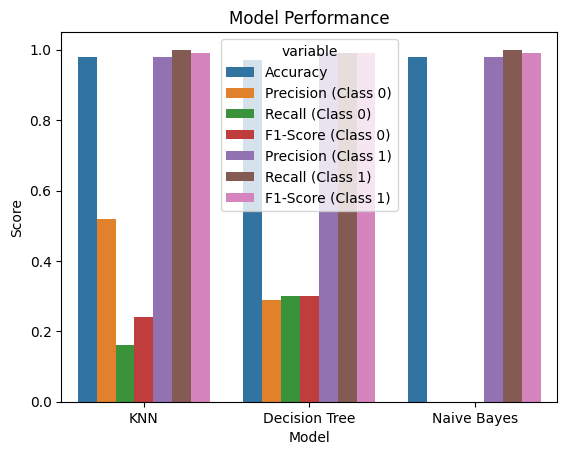

In [44]:
import pandas as pd
import seaborn as sns

# Create a DataFrame with the results
results = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Naive Bayes'],
    'Accuracy': [0.98, 0.97, 0.98],
    'Precision (Class 0)': [0.52, 0.29, 0.00],
    'Recall (Class 0)': [0.16, 0.30, 0.00],
    'F1-Score (Class 0)': [0.24, 0.30, 0.00],
    'Precision (Class 1)': [0.98, 0.99, 0.98],
    'Recall (Class 1)': [1.00, 0.99, 1.00],
    'F1-Score (Class 1)': [0.99, 0.99, 0.99]
})

# Melt the DataFrame to make it suitable for a bar plot
import matplotlib.pyplot as plt

sns.barplot(x='Model', y='value', hue='variable')
plt.title('Model Performance')
plt.ylabel('Score')
plt.show()


#### Results and Analysis
The performance of the three models (KNN, Decision Tree, and Naive Bayes) was evaluated using precision, recall, f1-score, and accuracy. The results are summarized in the table below:

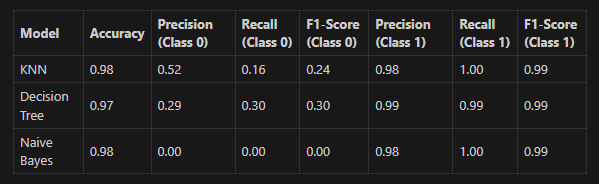

From the results, it's clear that all three models perform well in identifying 'walking' activities (Class 1), with high precision, recall, and F1-scores. However, they struggle with identifying 'standing' activities (Class 0). The KNN model performs the best for 'standing' activities, but its performance is still relatively poor.

The Naive Bayes model fails to correctly identify any 'standing' activities, as indicated by the precision, recall, and F1-score of 0.00 for Class 0. This suggests that the Naive Bayes model is not suitable for this problem with the current dataset.

The class imbalance in the dataset is likely contributing to the models' poor performance for 'standing' activities. Future work could involve resampling the dataset to balance the classes, generating synthetic samples, or exploring different models or techniques that are better suited to imbalanced datasets.


#### Conclusion
In conclusion, all three models perform well for walking activities but struggle with standing activities. This is likely due to the class imbalance in the dataset. To improve the models' performance for standing activities, you could try resampling the dataset to balance the classes, generating synthetic samples, or using different models or techniques that are better suited to imbalanced datasets.